<a href="https://colab.research.google.com/github/ShrutiBobba/Road-Sign-Recognition/blob/main/road_sign_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pathlib
import numpy as np
import random
import matplotlib.pyplot as plt
import os
import pandas as pd
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')


In [11]:
import pathlib
file_path = "/content/drive/MyDrive/PROJECTS/Road sign prediction/Dataset/Train"
data_dir = pathlib.Path(file_path)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['Bicycles crossing' 'Bumpy road' 'Children crossing'
 'Dangerous curve left' 'Dangerous curve right' 'End of no passing'
 'General caution' 'Go straight or left' 'Go straight or right' 'No entry'
 'No passing' 'No passing veh over 3.5 tons' 'No vehicles' 'Pedestrians'
 'Priority road' 'Right-of-way at intersection'
 'Road narrows on the right' 'Road work' 'Roundabout mandatory'
 'Slippery road' 'Speed limit (100km h)' 'Speed limit (120km h)'
 'Speed limit (20km h)' 'Speed limit (30km h)' 'Speed limit (50km h)'
 'Speed limit (60km h)' 'Speed limit (70km h)' 'Speed limit (80km h)'
 'Stop' 'Traffic signals' 'Turn left ahead' 'Turn right ahead'
 'Veh > 3.5 tons prohibited' 'assets' 'fingerprint.pb' 'keras_metadata.pb'
 'saved_model.pb' 'variables']


In [12]:
len(class_names)

38

In [14]:
import os

# Dictionary of old and new subdirectory names
rename_dict = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

# Get the current working directory
cwd = '/content/drive/MyDrive/PROJECTS/Road sign prediction/Dataset/Train'

# Loop through each subdirectory in the current working directory
for subdir in os.listdir(cwd):
    # Check if the subdirectory name is a numeric string
    if subdir.isnumeric():
        # Convert the subdirectory name to an integer
        subdir_num = int(subdir)
        # Check if the integer is in the dictionary
        if subdir_num in rename_dict:
            # Get the new name for the subdirectory
            new_name = rename_dict[subdir_num]
            # Rename the subdirectory
            os.rename(os.path.join(cwd, subdir), os.path.join(cwd, new_name))
            print(f"Renamed {subdir} to {new_name}")


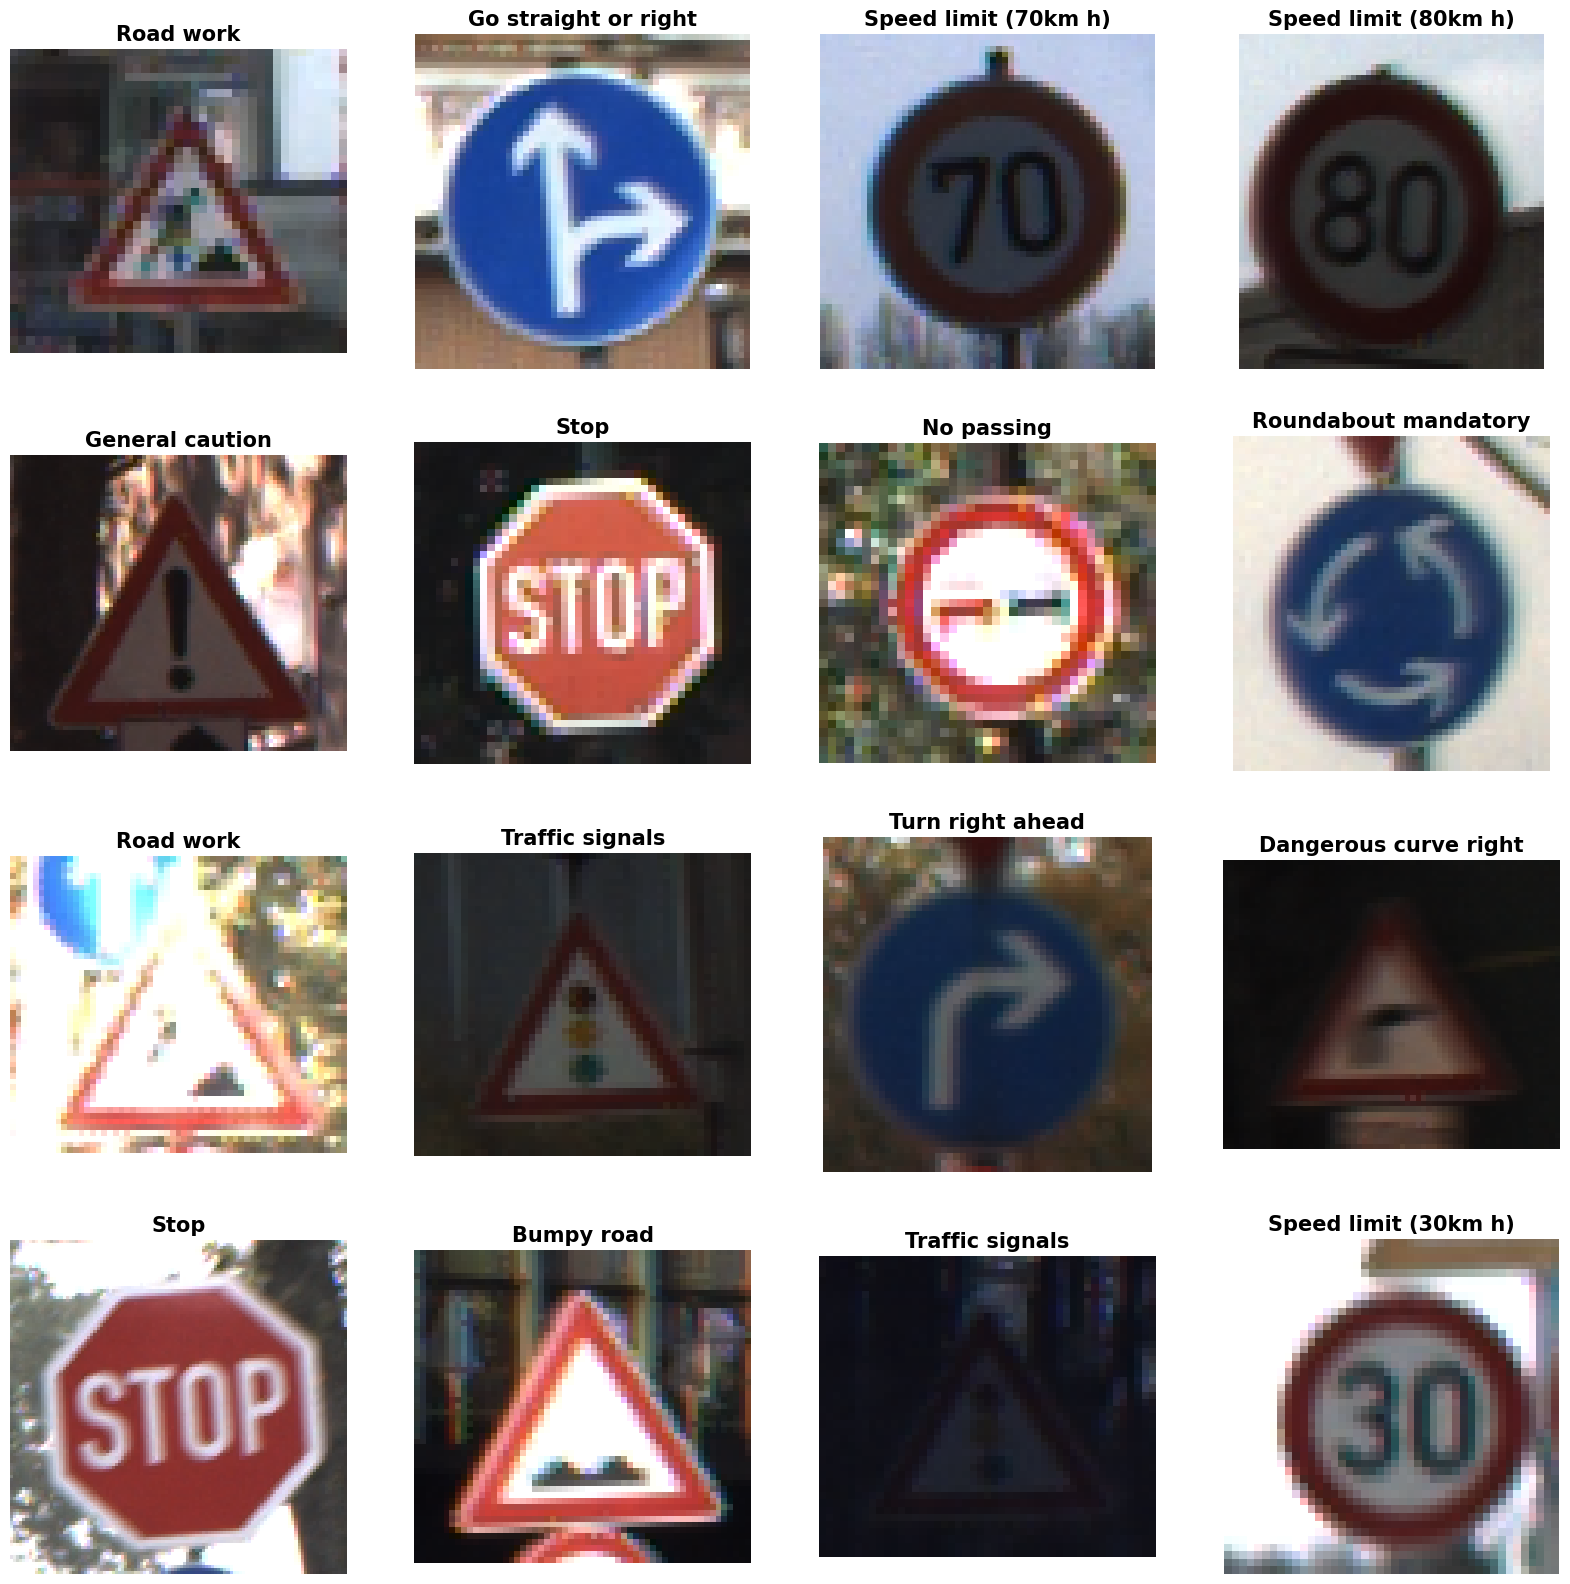

In [15]:
import random
plt.figure(figsize=(20, 20)) 
for i in range(16):
    ax = plt.subplot(4, 4, i+1)
    random_class = random.randint(0, 32)
    folder_path = file_path + '/' + class_names[random_class]
    random_image_path = folder_path + '/' + (random.sample(os.listdir(folder_path), 1)[0])
    image = plt.imread(random_image_path)
    plt.axis('off')
    plt.title(class_names[random_class], fontsize = 15, fontweight = 'bold')
    plt.imshow(image)

In [16]:
import tensorflow as tf
SEED = 1  
BATCH_SIZE = 64
IMG_SIZE = (128, 128)

X_train = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    seed = SEED,
    image_size = IMG_SIZE,
    batch_size = BATCH_SIZE,
    validation_split = 0.2,
    subset = 'training'
)

X_validation = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    seed = SEED,
    image_size = IMG_SIZE,
    batch_size = BATCH_SIZE,
    validation_split = 0.2,
    subset = 'validation'
)

Found 31019 files belonging to 35 classes.
Using 24816 files for training.
Found 31019 files belonging to 35 classes.
Using 6203 files for validation.


In [17]:
from os import listdir
from keras.preprocessing.image import ImageDataGenerator
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import imutils    
from tensorflow.keras.models import Model,load_model
from tensorflow.keras.layers import Conv2D,Input,ZeroPadding2D,BatchNormalization,Flatten,Activation,Dense,MaxPooling2D
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle #shuffling the data improves the model

In [18]:
IMG_SIZE=(128,128)
INPUT_SHAPE = IMG_SIZE + (3,)
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Rescaling(scale=1./255, input_shape=INPUT_SHAPE))
model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.20))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(33, activation = 'softmax'))

In [19]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint, ReduceLROnPlateau

In [20]:
# Set the hyperparameters
learning_rate = 0.0001
num_epochs = 30
early_stop_patience = 10

In [21]:
optimizer = Adam(learning_rate=learning_rate)

In [22]:
# Set up callbacks for the training process
log_dir = 'logs/'
tb_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)
model_filepath='/content/drive/MyDrive/PROJECTS/Brain tumor detection/brain_tumor_dataset/model-{epoch:02d}-{val_accuracy:.4f}.hdf5'
checkpoint = ModelCheckpoint(model_filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
reduce_lr_callback = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5)
early_stop_callback = EarlyStopping(monitor='val_loss', patience=early_stop_patience)

In [23]:
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 128, 128, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        1

In [ ]:
history = model.fit(X_train,epochs=10, validation_data=X_validation,verbose=1)

Epoch 1/10
388/388 [==============================] - 258s 659ms/step - loss: 2.0725 - accuracy: 0.4287 - val_loss: 1.2021 - val_accuracy: 0.6445
Epoch 2/10
388/388 [==============================] - 257s 661ms/step - loss: 0.7729 - accuracy: 0.7780 - val_loss: 0.4992 - val_accuracy: 0.8630
Epoch 3/10
388/388 [==============================] - 256s 660ms/step - loss: 0.3946 - accuracy: 0.8927 - val_loss: 0.3422 - val_accuracy: 0.8984
Epoch 4/10
388/388 [==============================] - 257s 661ms/step - loss: 0.2558 - accuracy: 0.9301 - val_loss: 0.2481 - val_accuracy: 0.9336
Epoch 5/10
388/388 [==============================] - 256s 658ms/step - loss: 0.1776 - accuracy: 0.9535 - val_loss: 0.1878 - val_accuracy: 0.9532
Epoch 6/10
388/388 [==============================] - 255s 656ms/step - loss: 0.1335 - accuracy: 0.9642 - val_loss: 0.1657 - val_accuracy: 0.9602
Epoch 7/10
388/388 [==============================] - 256s 658ms/step - loss: 0.1027 - accuracy: 0.9737 - val_loss: 0.1455 -

In [ ]:
model_evaluate = model.evaluate(X_validation)
print("Accuracy: %", "{:.2f}".format(model_evaluate[1]*100))
print("Loss: %", "{:.2f}".format(model_evaluate[0]*100))

97/97 [==============================] - 19s 188ms/step - loss: 0.1187 - accuracy: 0.9721
Accuracy: % 97.21
Loss: % 11.87


[]

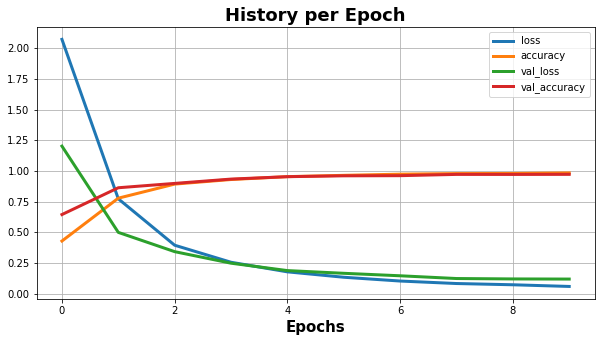

In [ ]:
df = pd.DataFrame(history.history)
ax = df.plot(figsize=(10,5), lw=3, grid='on')
ax.set_title('History per Epoch', fontsize=18, fontweight='bold')
ax.set_xlabel('Epochs', fontsize=15, fontweight='bold')
ax.plot()

In [ ]:
model.save('/content/drive/MyDrive/RoadSignPrediction/Road_sign_model20000.h5')

1/1 [==============================] - 0s 26ms/step


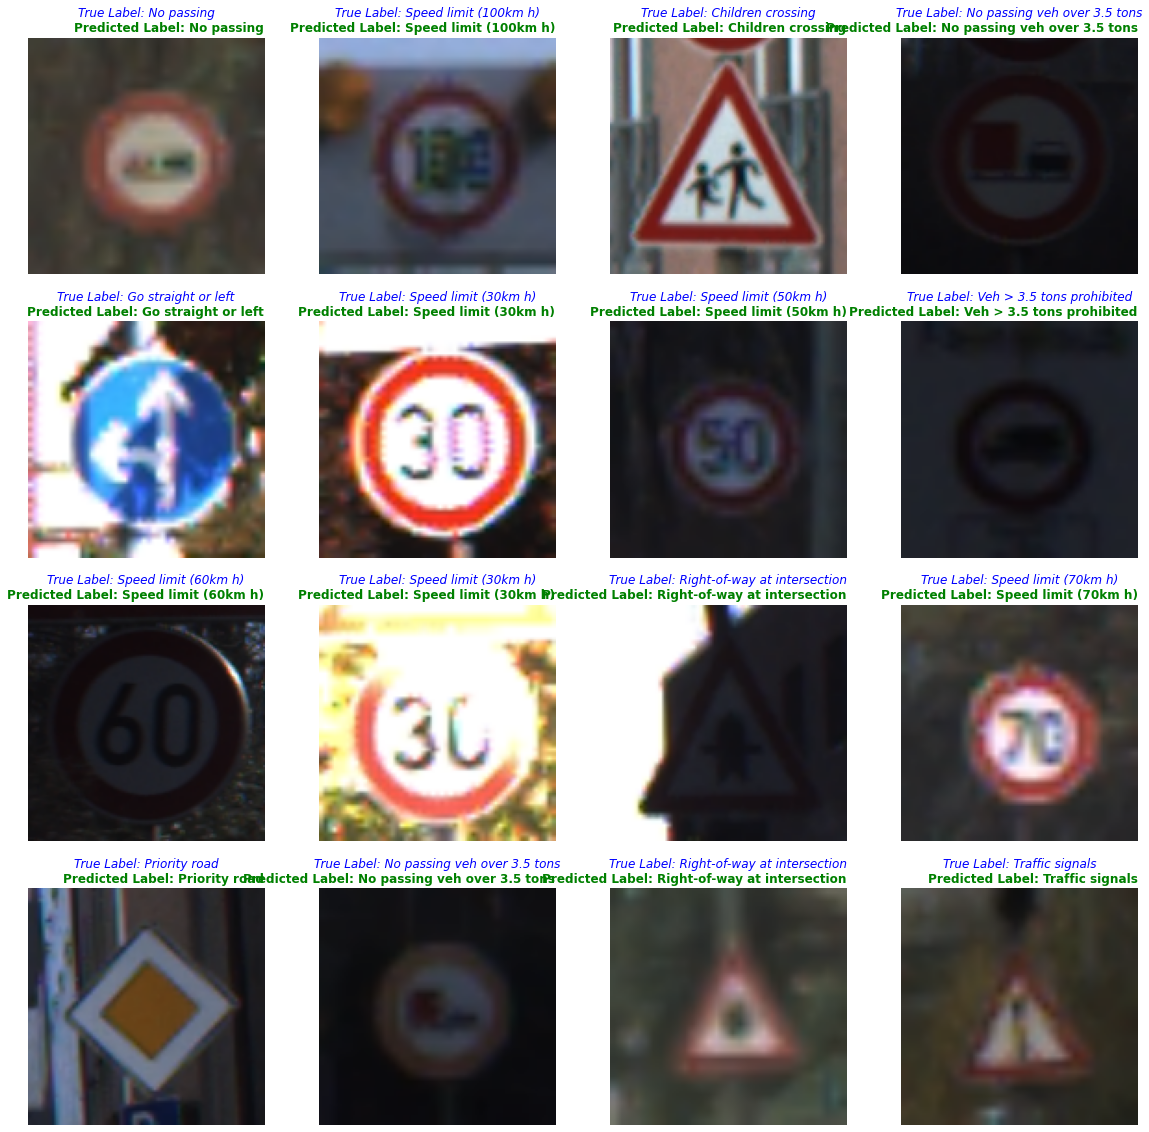

In [ ]:
plt.figure(figsize=(20, 20))
for image, label in X_validation.take(1): 
    for i in range(16):
        ax = plt.subplot(4, 4, i+1)
        img = image[i].numpy().astype("uint8")
        img = tf.expand_dims(img, axis=0)
        predicted_class = np.argmax(model.predict(img))
        plt.axis('off')
        plt.title("True Label: " + class_names[label[i]]+'\n', fontsize=12, style='italic', color='blue', loc='center')
        plt.title("Predicted Label: " + class_names[predicted_class], fontsize=12, fontweight='bold', color='green', loc='right')
        plt.imshow(image[i].numpy().astype("uint8"))

In [25]:
from tensorflow.keras.models import load_model
model = load_model('/content/drive/MyDrive/PROJECTS/Road sign prediction/Road_sign_model20000.h5')


In [6]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 47.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.3/75.3 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 44.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.6/135.6 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.7/286.7 kB 21.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 k

In [26]:
model = load_model('/content/drive/MyDrive/PROJECTS/Road sign prediction/Road_sign_model20000.h5')

In [ ]:
import gradio as gr
import cv2


# Define a function to run the model on user input and return predictions
def predict_image(img_array):
    img_array = cv2.resize(img_array, (128, 128))
    img_array = np.array(img_array).reshape(1, 128, 128, 3)
    prediction = model.predict([img_array])
    class_idx = np.argmax(prediction)
    class_name = class_names[class_idx]
    return class_name

# Define the input and output components of the Gradio interface
inputs = gr.inputs.Image(shape=(128, 128))
outputs = gr.outputs.Label(num_top_classes=len(class_names))

# Create the Gradio interface
interface = gr.Interface(fn=predict_image, inputs=inputs, outputs=outputs, 
                         title='Road Sign ')

# Launch the interface
interface.launch(share=True,debug=True)


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://9f1583944fab9ec65d.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces


1/1 [==============================] - 0s 367ms/step
